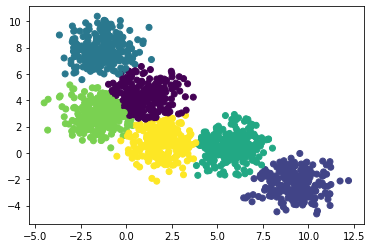

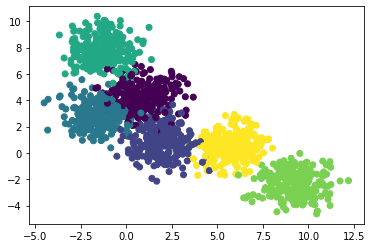

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers=6, cluster_std=1.0)

from sklearn.cluster import KMeans 
km = KMeans(n_clusters=6) 

y_pred = km.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y_pred)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y)

[[ 0.9769402   4.28310097]
 [ 9.22486184 -2.32845282]
 [-1.31011746  7.8644326 ]
 [ 5.74346966  0.51291896]
 [-1.51454175  2.87664855]
 [ 1.94251736  0.79187548]]
2603.2681658352576


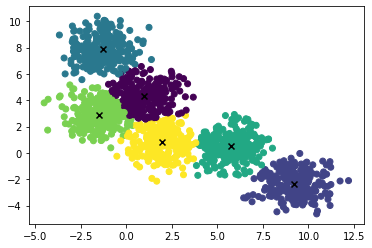

In [5]:
print(km.cluster_centers_)
cent = km.cluster_centers_
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y_pred)
ax.scatter(cent[:, 0], cent[:, 1], c = 'k', marker = 'x')

print(km.inertia_)

[[-0.90241804 -0.43086156]
 [-0.43086156  0.90241804]]
25.522249555932632


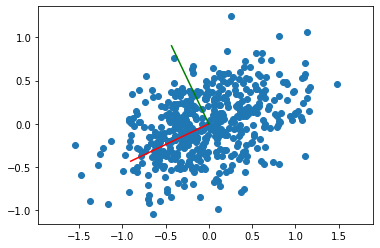

In [6]:
def get_cov(sdx=1, sdy=1, rotangdeg=0):
  covar = np.array([[sdx, 0], [0, sdy]])
  rot_ang = rotangdeg / 360 * 2 * np.pi
  rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])
  
  covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
  return covar 

covar = get_cov(sdx=0.3, sdy = 0.1, rotangdeg = 23)
X = np.random.multivariate_normal([0, 0], covar, 500)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.axis('equal')

from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(X)

comp = pca.components_
print(comp)

plt.plot([0, comp[0, 0]],[0, comp[0, 1]],'r-')
plt.plot([0, comp[1, 0]],[0, comp[1, 1]],'g-')

#calculate angle
px = comp[0, 0]
py = comp[0, 1]
ang = np.mod(np.arctan2(py,px)/2/np.pi*360,180)
print(ang)